In [1]:
from src.Preprocess_Data import Preprocess_Data
from src.Classify_Data import Classify_Data
from src.Visualize_Results import Visualize_Results
import warnings
warnings.filterwarnings('ignore')

In [2]:
# we load our data
path = 'data/train.csv'
Pd = Preprocess_Data(path)
data = Pd.load_data_from_csv()
data = data.drop('id', axis=1)
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.007812,0.023438,0.023438,0.003906,0.011719,0.009766,0.027344,0.0,0.001953,...,0.007812,0.000000,0.002930,0.002930,0.035156,0.0,0.0,0.004883,0.000000,0.025391
1,Pterocarya_Stenoptera,0.005859,0.000000,0.031250,0.015625,0.025391,0.001953,0.019531,0.0,0.000000,...,0.000977,0.000000,0.000000,0.000977,0.023438,0.0,0.0,0.000977,0.039062,0.022461
2,Quercus_Hartwissiana,0.005859,0.009766,0.019531,0.007812,0.003906,0.005859,0.068359,0.0,0.000000,...,0.154300,0.000000,0.005859,0.000977,0.007812,0.0,0.0,0.000000,0.020508,0.002930
3,Tilia_Tomentosa,0.000000,0.003906,0.023438,0.005859,0.021484,0.019531,0.023438,0.0,0.013672,...,0.000000,0.000977,0.000000,0.000000,0.020508,0.0,0.0,0.017578,0.000000,0.047852
4,Quercus_Variabilis,0.005859,0.003906,0.048828,0.009766,0.013672,0.015625,0.005859,0.0,0.000000,...,0.096680,0.000000,0.021484,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.031250


In [3]:
# we normalize our data between 0 and 1
df = data.drop('species', axis=1)
columns = df.columns
df_normalized = Pd.normalize_data(df, columns)
data[columns] = df_normalized
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,Acer_Opalus,0.088883,0.114287,0.150003,0.022987,0.105264,0.031447,0.297875,0.0,0.025639,...,0.018181,0.000000,0.016951,0.014635,0.330258,0.0,0.0,0.012987,0.000000,0.179315
1,Pterocarya_Stenoptera,0.066662,0.000000,0.200000,0.091955,0.228070,0.006289,0.212763,0.0,0.000000,...,0.002274,0.000000,0.000000,0.004880,0.220178,0.0,0.0,0.002599,0.449433,0.158623
2,Quercus_Hartwissiana,0.066662,0.047620,0.124998,0.045975,0.035085,0.018867,0.744676,0.0,0.000000,...,0.359096,0.000000,0.033896,0.004880,0.073387,0.0,0.0,0.000000,0.235957,0.020692
3,Tilia_Tomentosa,0.000000,0.019046,0.150003,0.034481,0.192976,0.062892,0.255324,0.0,0.179489,...,0.000000,0.004833,0.000000,0.000000,0.192654,0.0,0.0,0.046752,0.000000,0.337938
4,Quercus_Variabilis,0.066662,0.019046,0.312499,0.057474,0.122806,0.050314,0.063826,0.0,0.000000,...,0.224999,0.000000,0.124293,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.220692


In [4]:
labels = data['species'].copy()
encoded_labels = Pd.label_encoding(labels)
data['species'] = encoded_labels
data.head()

,species,margin1,margin2,margin3,margin4,margin5,margin6,margin7,margin8,margin9,...,texture55,texture56,texture57,texture58,texture59,texture60,texture61,texture62,texture63,texture64
0,3,0.088883,0.114287,0.150003,0.022987,0.105264,0.031447,0.297875,0.0,0.025639,...,0.018181,0.000000,0.016951,0.014635,0.330258,0.0,0.0,0.012987,0.000000,0.179315
1,49,0.066662,0.000000,0.200000,0.091955,0.228070,0.006289,0.212763,0.0,0.000000,...,0.002274,0.000000,0.000000,0.004880,0.220178,0.0,0.0,0.002599,0.449433,0.158623
2,65,0.066662,0.047620,0.124998,0.045975,0.035085,0.018867,0.744676,0.0,0.000000,...,0.359096,0.000000,0.033896,0.004880,0.073387,0.0,0.0,0.000000,0.235957,0.020692
3,94,0.000000,0.019046,0.150003,0.034481,0.192976,0.062892,0.255324,0.0,0.179489,...,0.000000,0.004833,0.000000,0.000000,0.192654,0.0,0.0,0.046752,0.000000,0.337938
4,84,0.066662,0.019046,0.312499,0.057474,0.122806,0.050314,0.063826,0.0,0.000000,...,0.224999,0.000000,0.124293,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.220692


In [5]:
X_train, X_test, y_train, y_test = Pd.Split_data(data, 'species')

In [6]:
six_classifiers = [ 
    {
        'model':'RandomForestClassifier',
        'params': {
            'n_estimators' : [50, 75, 100],
            'min_samples_split': [2, 3, 4, 5],
            'criterion': ["gini", "entropy"],
        }
    },
    {
        'model':'AdaBoostClassifier',   
        'params':{
            'n_estimators': [50, 75, 100], 
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    {
        'model': 'BaggingClassifier', #plus de 30min
        'params':{
            'n_estimators': [50, 75, 100],
            'max_samples': [0.5, 0.7, 1.0],
            'bootstrap': [True, False]
        } 
    },
    {
        'model': 'SGDClassifier', #one min meme pas
        'params':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    {
        'model': 'KNeighborsClassifier',  #takes qlq secondes bash entraina
        'params':{
            'n_neighbors': [3, 5, 7, 10, 12, 15],
        }
 
    },
    {
        'model': 'LogisticRegression', # 2mins
        'params':{
            'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2.0],
            'solver': ['liblinear', 'newton-cg', 'lbfgs']
        }
    }
    
     
]

In [7]:
six_classifiers =[{
        'model': 'SGDClassifier', #one min meme pas
        'params':{
            'loss': ['hinge', 'log_loss'],
            'alpha': [0.0001, 0.001, 0.01],
        }
    },
    {
        'model': 'KNeighborsClassifier',  #takes qlq secondes bash entraina
        'params':{
            'n_neighbors': [3, 5, 7, 10, 12, 15],
        }
 
    },
    {
        'model': 'LogisticRegression', # 2mins
        'params':{
            'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1, 1.5, 2.0],
            'solver': ['liblinear', 'newton-cg', 'lbfgs']
        }
    }
]

In [8]:
Cd = Classify_Data()
classifiers = Cd.get_classifiers(six_classifiers)

trained_classifiers, best_scores, best_estimators = Cd.train_classifier(X_train, y_train, classifiers)


In [9]:
best_scores, best_estimators

([0.9652996126680338, 0.9592845750740487, 0.9773866484392799],
 [SGDClassifier(alpha=0.001, loss='log_loss'),
  KNeighborsClassifier(n_neighbors=3),
  LogisticRegression(C=1.5, solver='newton-cg')])

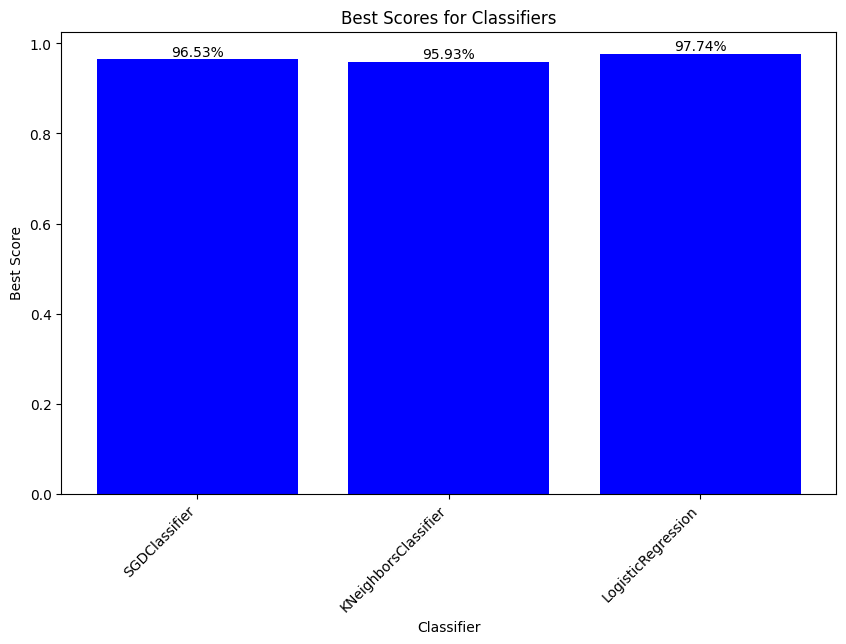

In [10]:
EvR = Visualize_Results()
EvR.plot_training_scores(best_scores, six_classifiers)

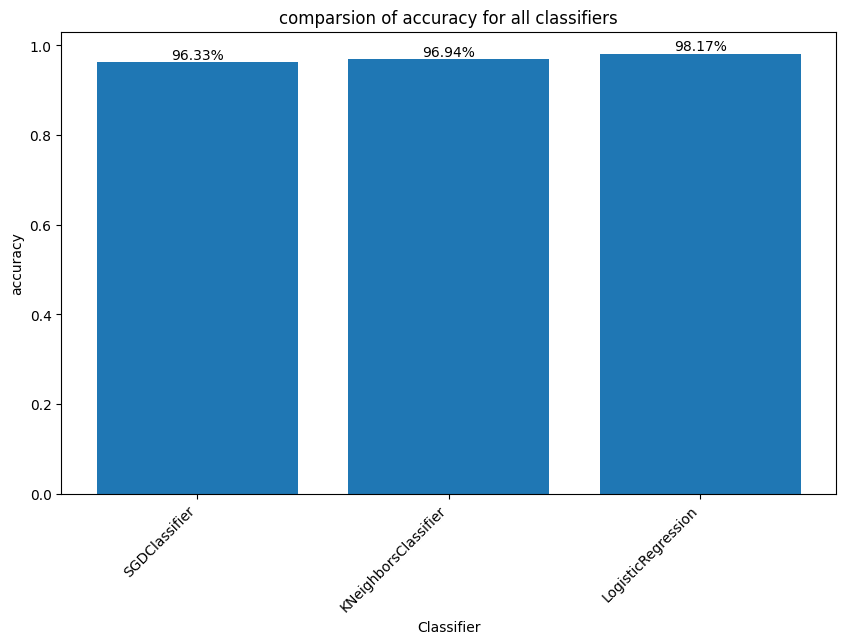

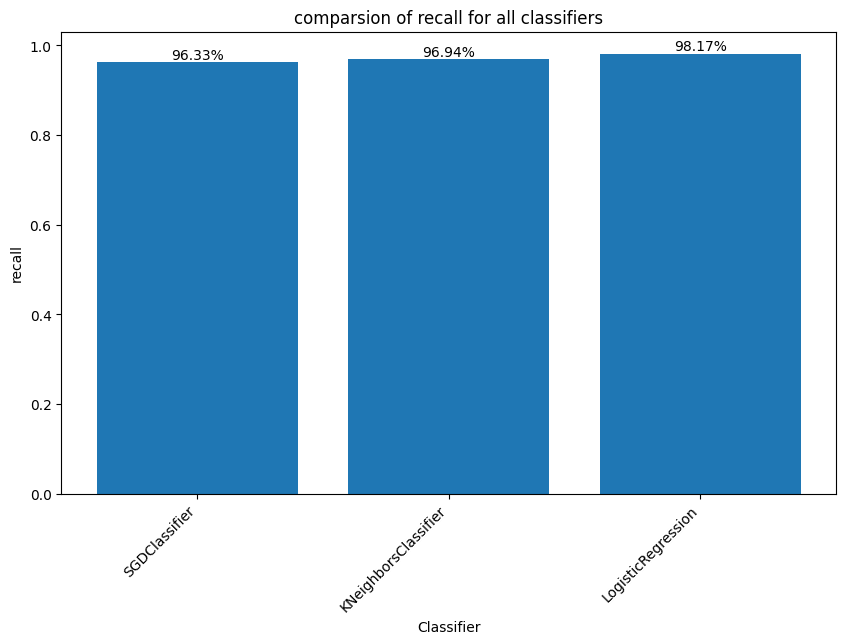

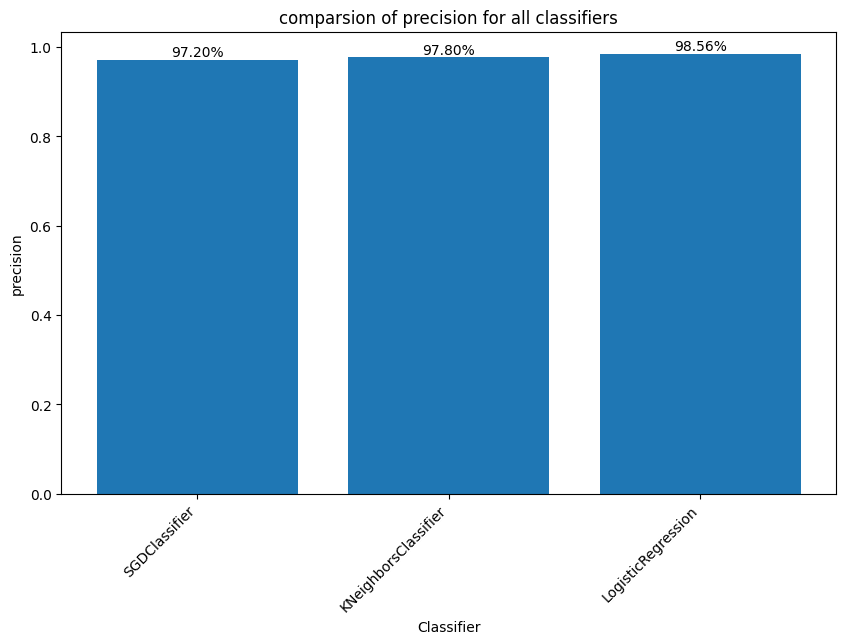

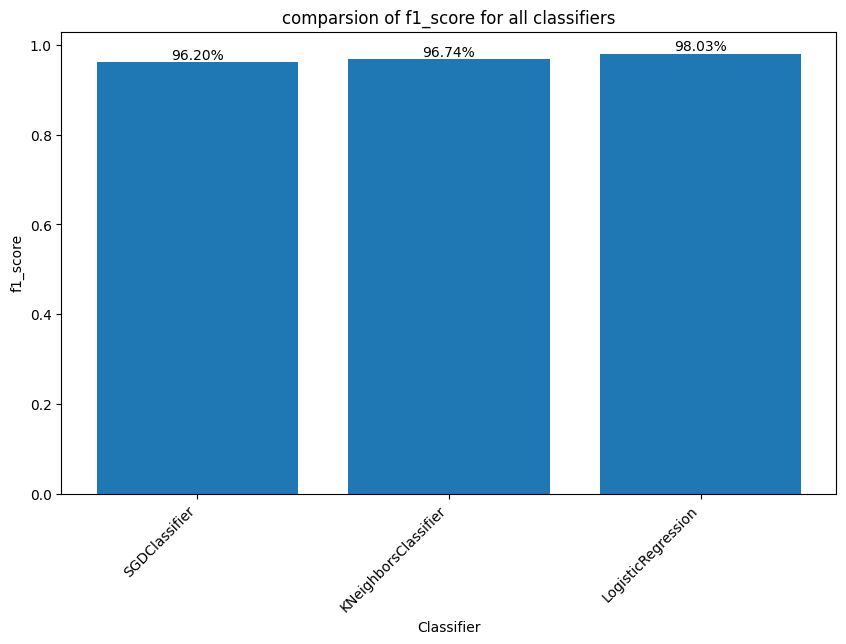

In [11]:
evaluation_results = Cd.predict_and_evaluate(X_test, y_test, trained_classifiers, six_classifiers)
EvR.plot_evaluation_results(evaluation_results)

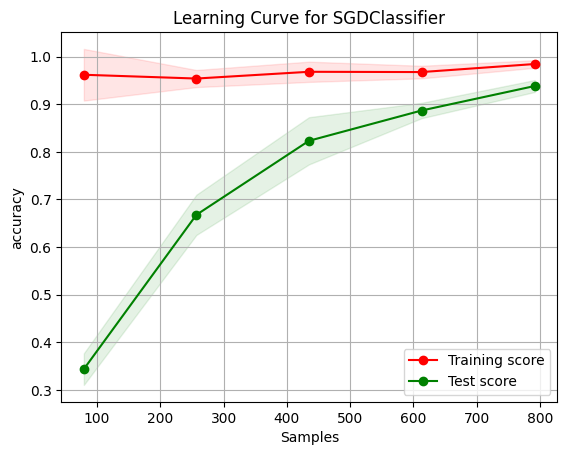

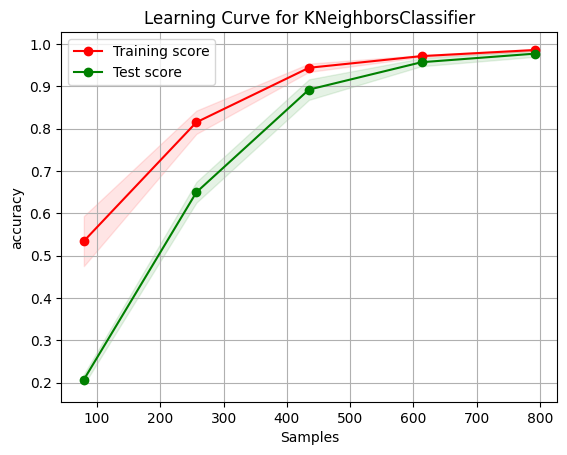

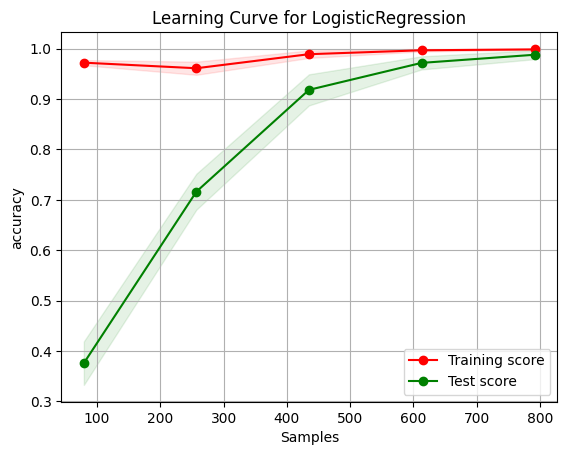

In [12]:
X =data.drop('species', axis = 1)
y = data['species']
EvR.plot_learning_curve(X, y, six_classifiers)